In [ ]:
!gdown 1vtJM68td0jampSL1XoXKvgmWkLeKT1Dg
!gdown 1G2Vx2NLnKQb5zAZQw5A9LwMHi5hLWYN2
!gdown 1RpZE5tq4s8JShzmxj-3ncBZfVcefEYHe
!gdown 1s2nKQYycgfXn8P0AybfDyoB2xx2bgS1m

Downloading...
From: https://drive.google.com/uc?id=1vtJM68td0jampSL1XoXKvgmWkLeKT1Dg
To: /content/active_subjects.csv
100% 32.8M/32.8M [00:00<00:00, 164MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1G2Vx2NLnKQb5zAZQw5A9LwMHi5hLWYN2
From (redirected): https://drive.google.com/uc?id=1G2Vx2NLnKQb5zAZQw5A9LwMHi5hLWYN2&confirm=t&uuid=bacf42d5-7b05-4c1a-9031-88a5e4a661d8
To: /content/audiencies.csv
100% 126M/126M [00:01<00:00, 102MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RpZE5tq4s8JShzmxj-3ncBZfVcefEYHe
To: /content/institutions.csv
100% 42.3k/42.3k [00:00<00:00, 71.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1s2nKQYycgfXn8P0AybfDyoB2xx2bgS1m
To: /content/passive_subjects.csv
100% 1.65M/1.65M [00:00<00:00, 87.7MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
active_subjects = pd.read_csv('active_subjects.csv')
audiences = pd.read_csv('audiencies.csv')
institutions = pd.read_csv('institutions.csv')
passive_subjects = pd.read_csv('passive_subjects.csv')

Los usuarios de nuestro sistema recomendador se refieren a los sujetos pasivos y los Item hacen las veces de Sujetos Activos, en este caso se representan como los nombres

In [ ]:
active_subjects.size

2741488

Nuestro dataframe cuenta con 2'741.488 audiencias entre sujetos activos y sujetos pasivos

In [ ]:
audiences.head()

,institucion_id,sujeto_pasivo_id,anio,identificador,fecha,forma,lugar,duracion,audiencia_id,detalle_url,materias_tratadas,especificacion
0,AB007,456953,2022,AB007AW1193795,2022-09-02 03:30:00-04:00,Presencial,San Marcos N° 157 - Delegación Presidencial Re...,"0 horas, 30 minutos",567536,https://www.leylobby.gob.cl/instituciones/AB00...,"Celebración, modificación o terminación a cual...",De parte de la Mesa de Migrantes desde Santiag...
1,AB007,456953,2022,AB007AW1093871,2022-03-30 10:00:00-03:00,Presencial,Delegación Presidencial Región de Arica y Pari...,"1 horas, 0 minutos",690135,https://www.leylobby.gob.cl/instituciones/AB00...,"Diseño, implementación y evaluación de polític...",Temas: 1- ciclo vía frente Sede Linea N° 11 Ca...
2,AB007,456953,2022,AB007AW1098617,2022-04-08 08:30:00-04:00,Presencial,Gabinete de la Delegación Presidencial Regiona...,"1 horas, 0 minutos",690700,https://www.leylobby.gob.cl/instituciones/AB00...,"Elaboración, dictación, modificación, denegaci...",Continuación del nuevo trazado de alta tensión...
3,AB007,456953,2022,AB007AW1095123,2022-04-04 10:00:00-04:00,Presencial,Gabinete Delegación Presidencial Regional de A...,"1 horas, 0 minutos",690707,https://www.leylobby.gob.cl/instituciones/AB00...,"Diseño, implementación y evaluación de polític...",Proyectos de infraestructura
4,AB007,456953,2022,AB007AW1095288,2022-04-20 09:00:00-04:00,Presencial,Gabinete Delegado Presidencial Regional de Ari...,"1 horas, 0 minutos",690712,https://www.leylobby.gob.cl/instituciones/AB00...,"Diseño, implementación y evaluación de polític...",LAS NECESIDADES DE LAS PERSONAS CON TRISOMIA 2...


In [ ]:
institutions.head()

,id,name
0,AA001,Presidencia de la República
1,AB001,Subsecretaría del Interior
2,AB002,Subsecretaría de Desarrollo Regional
3,AB003,Agencia Nacional de Inteligencia
4,AB004,Servicio Nacional de Prevención y Respuesta an...


In [ ]:
passive_subjects.head()

,nombre,cargo,id,institution_id
0,Ricardo Sanzana,Delegado Presidencial Regional,456953,AB007
1,Luis Pizarro,Jefe Departamento de Coordinación Intersectorial,658160,AB007
2,Carmen Tupa,Delegado Presidencial Regional,811510,AB007
3,Cristian Riquelme,Director Administrativo,2509,AA001
4,Natalie Vilches Jara,Integrante de Comisión Evaluadora formada en e...,2524,AA001


In [ ]:
conteo = active_subjects.groupby("sujeto_pasivo_id")["audiencia_id"].count().reset_index()

# renombrar columna
conteo = conteo.rename(columns={"audiencia_id": "cantidad_audiencias"})

print(conteo)

      sujeto_pasivo_id  cantidad_audiencias
0                   15                   42
1                   33                  165
2                   40                    2
3                   41                   15
4                   43                  244
...                ...                  ...
9870            763081                    1
9871            763293                    1
9872            763937                    2
9873            769978                    1
9874            783338                    1

[9875 rows x 2 columns]


Contamos con 9875 sujetos pasivos distintos

In [ ]:
conteo_nombres = active_subjects.groupby("Nombre completo")["audiencia_id"].count().reset_index()
conteo_nombres = conteo_nombres.rename(columns={"audiencia_id": "cantidad_audiencias"})
conteo_nombres = conteo_nombres.sort_values(
    by="cantidad_audiencias", ascending=False
).reset_index(drop=True)

In [ ]:
conteo_nombres

,Nombre completo,cantidad_audiencias
0,Carlos Alberto Vargas Godoy,323
1,Marcelo Campos Larraín,208
2,Luis Figueroa,207
3,Jorge Cortés,200
4,Felipe Palacio,183
...,...,...
120783,A A,1
120784,ABELARDO ANTONIO MEDEL RIVAS,1
120785,ABELARDO ERNESTO CHAVEZ FLORES,1
120786,ítalo Jaque,1


Y un total de 120.788 Sujetos Activos distintos

## Manejo de datos

In [ ]:
df = active_subjects[["sujeto_pasivo_id", "Nombre completo"]].copy()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

df = active_subjects[["sujeto_pasivo_id", "Nombre completo"]].copy()

# espacio de etiquetas
nombres_unicos = df["Nombre completo"].unique()

# función para predecir aleatoriamente
def random_predict(df, nombres_unicos, seed=None):
    if seed is not None:
        np.random.seed(seed)
    return np.random.choice(nombres_unicos, size=len(df))

# generar predicciones
y_true = df["Nombre completo"].values
y_pred = random_predict(df, nombres_unicos, seed=42)

# medir precisión
precision = accuracy_score(y_true, y_pred)

print("Precisión del modelo aleatorio:", precision)


Precisión del modelo aleatorio: 8.754369889636577e-06


In [ ]:
from sklearn.metrics import accuracy_score

def most_popular_recommender(df):
    # encontrar el nombre más frecuente en todo el dataset
    most_popular = df["Nombre completo"].value_counts().idxmax()
    # predecir siempre ese nombre
    y_pred = [most_popular] * len(df)
    return y_pred

# uso
y_true = df["Nombre completo"].values
y_pred = most_popular_recommender(df)

precision = accuracy_score(y_true, y_pred)
print("Precisión del modelo Most Popular:", precision)


Precisión del modelo Most Popular: 0.0009425538247842047


In [ ]:
from sklearn.metrics import accuracy_score

def most_popular_by_id(df):
    # calcular el nombre más frecuente para cada sujeto_pasivo_id
    popular_map = (
        df.groupby("sujeto_pasivo_id")["Nombre completo"]
        .agg(lambda x: x.value_counts().idxmax())
        .to_dict()
    )

    # predecir según el sujeto_pasivo_id de cada fila
    y_pred = df["sujeto_pasivo_id"].map(popular_map).values
    return y_pred

# uso
y_true = df["Nombre completo"].values
y_pred = most_popular_by_id(df)

precision = accuracy_score(y_true, y_pred)
print("Precisión del modelo Most Popular por ID:", precision)


Precisión del modelo Most Popular por ID: 0.06460433166222139


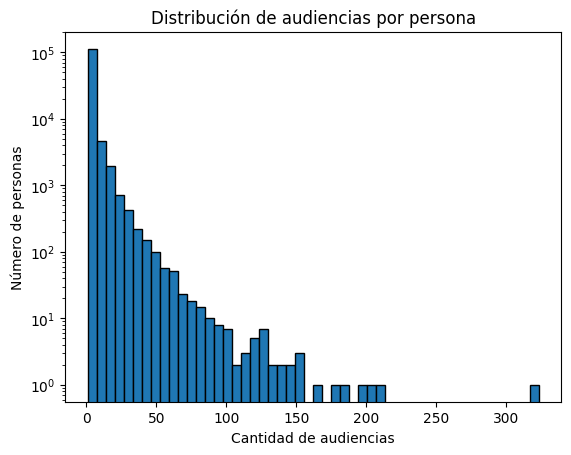

In [ ]:
import matplotlib.pyplot as plt

# contar audiencias por nombre
conteo = df["Nombre completo"].value_counts()

# histograma de las cantidades
plt.hist(conteo.values, bins=50, edgecolor="black", log = True)
plt.xlabel("Cantidad de audiencias")
plt.ylabel("Número de personas")
plt.title("Distribución de audiencias por persona")
plt.show()


In [ ]:
conteo

,count
Nombre completo,
Carlos Alberto Vargas Godoy,323
Marcelo Campos Larraín,208
Luis Figueroa,207
Jorge Cortés,200
Felipe Palacio,183
...,...
Erick Espinace,1
FRANCISCO JAVIER GUZMAN SANDOVAL,1
Felipe Parada,1
